## Principal Component Analysis (PCA) for Dimensionality Reduction

**Objective:**

Learn how to implement Principal Component Analysis (PCA) for dimensionality reduction using Python. This assignment includes understanding PCA concepts, implementing the technique using scikit-learn, and visualizing the results.

In [8]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Task 1: Load and Explore the Dataset

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target   class  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


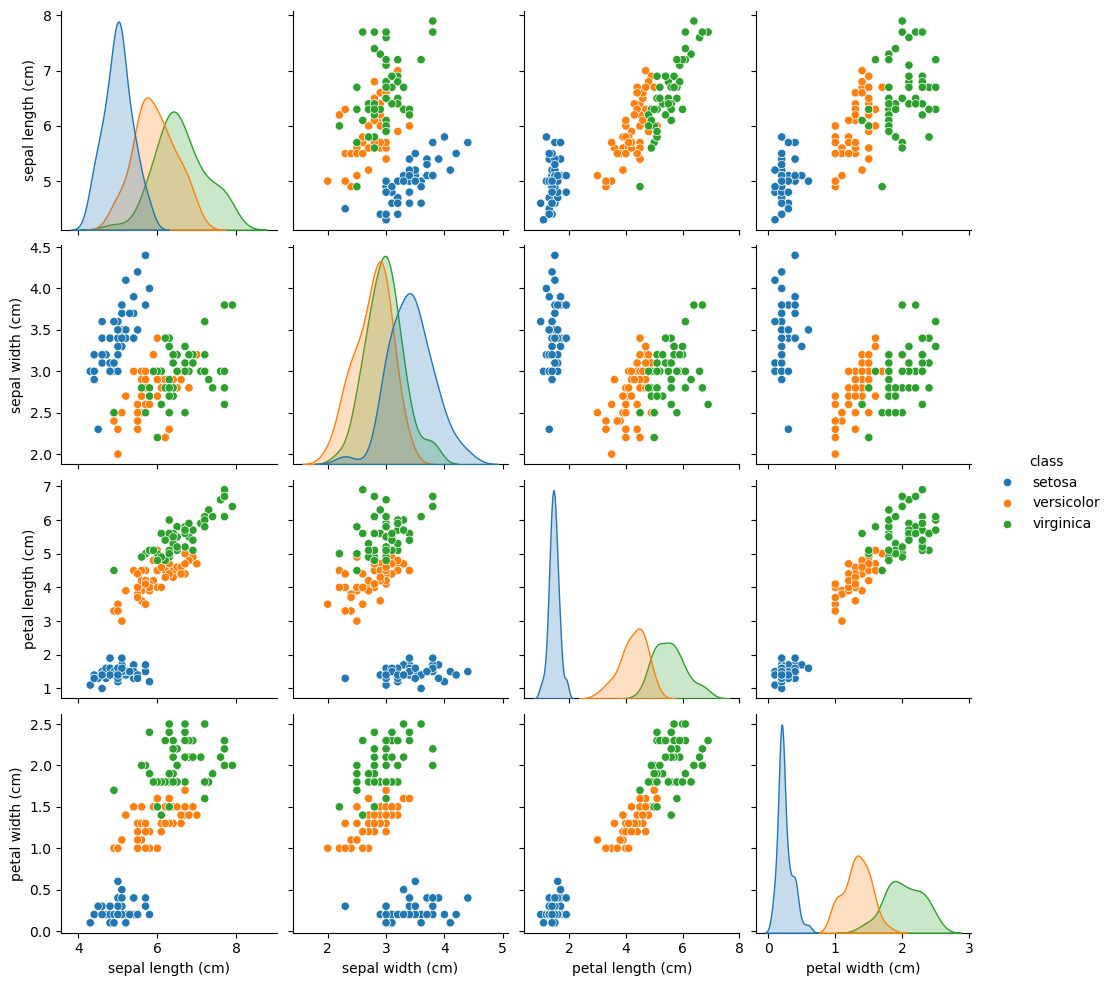

In [12]:
# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Map target to class names
data['class'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Inspect the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Visualize pair plots
sns.pairplot(data, hue='class', vars=iris.feature_names)
plt.show()

### Task 2: Standardize the Data

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[iris.feature_names])

# Verify standardization
print("Mean of each feature after standardization:", scaled_data.mean(axis=0))
print("Standard deviation of each feature after standardization:", scaled_data.std(axis=0))

Mean of each feature after standardization: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviation of each feature after standardization: [1. 1. 1. 1.]


### Task 3: Apply PCA

In [16]:
# Reduce to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained by First 2 Components:", explained_variance.sum())

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['class'] = data['class']

Explained Variance Ratio: [0.72962445 0.22850762]
Total Variance Explained by First 2 Components: 0.9581320720000165


### Task 4: Visualize the Results

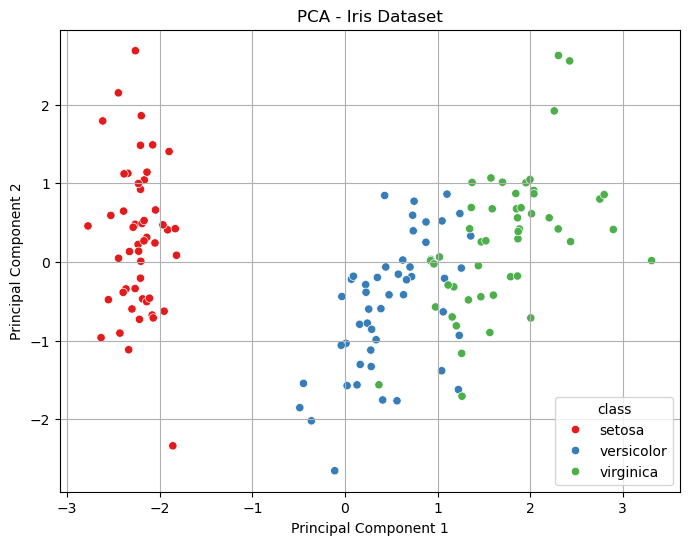

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='class',
    data=pca_df,
    palette='Set1'
)
plt.title('PCA - Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

### Task 5: Analyze the Results

In [20]:
print("Percentage of variance explained by the first principal component:", explained_variance[0] * 100, "%")
print("Percentage of variance explained by the second principal component:", explained_variance[1] * 100, "%")

Percentage of variance explained by the first principal component: 72.9624454132999 %
Percentage of variance explained by the second principal component: 22.850761786701746 %
